In [3]:
import pandas as pd
import numpy as np

In [7]:
a=pd.read_csv("u.data",sep='\t',names=['user_id', 'item_id', 'rating', 'timestamp'])

In [8]:
a

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [9]:
a.shape

(100003, 4)

In [11]:
b=pd.read_csv("Movie_Id_Titles.txt")

In [12]:
b

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [15]:
c=a.merge(b,  on='item_id')
c

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [16]:
c.isna().any()

user_id      False
item_id      False
rating       False
timestamp    False
title        False
dtype: bool

Dataset Analysis

In [29]:
c.groupby('title')['rating'].mean().sort_values(ascending=False)


title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [32]:
c.groupby('title')['rating'].count().sort_values(ascending=False)


title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [34]:
rating=pd.DataFrame(c.groupby('title')['rating'].mean())

In [35]:
rating['vote_count']=pd.DataFrame(c.groupby('title')['rating'].count())


In [36]:
rating

,rating,vote_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


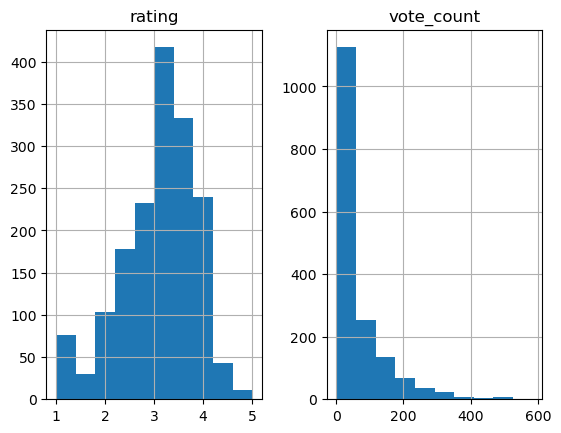

In [37]:
hist = rating.hist(bins=10)

In [43]:
table = c.pivot_table(index='user_id',columns='title',values='rating')
table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Take a movie data from the above table to find out the correlation with other movies

In [44]:
movie_data=table['Return of the Jedi (1983)']

In [49]:
cor_with_movie=table.corrwith(movie_data)

c:\Users\rayqu\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\rayqu\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [50]:
cor_with_movie

title
'Til There Was You (1997)                1.000000
1-900 (1994)                            -0.828079
101 Dalmatians (1996)                    0.165659
12 Angry Men (1957)                     -0.026169
187 (1997)                               0.064155
                                           ...   
Young Guns II (1990)                     0.347842
Young Poisoner's Handbook, The (1995)    0.036205
Zeus and Roxanne (1997)                  0.866025
unknown                                  0.842440
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [52]:
cor_with_Jedi=pd.DataFrame(cor_with_movie,columns=['correlation'])

In [56]:
cor_with_Jedi=cor_with_Jedi.join(rating['vote_count'])

In [58]:
cor_with_Jedi=cor_with_Jedi[cor_with_Jedi['vote_count']>100]

In [70]:
cor_with_Jedi[cor_with_Jedi['correlation']>0.6].sort_values('vote_count',ascending=False).head()

,correlation,vote_count
title,,
Star Wars (1977),0.672556,584
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368


The above movies can be recommended to person who watched Return of the Jedi (1983) (expect the Return of the Jedi (1983))